<h1 style="background-color:black;font-family:newtimeroman;text-align:center;border-radius: 0px 100px"><font color=white size=7>Anomaly Detection</h1>


[Link dos dados no kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020?select=euro-daily-hist_1999_2022.csv)
    
   > This anomaly detection considers the IQR Indice

# 00. Libreries
---

In [31]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [32]:
od.download("https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020")

path = '/Users/felipebarreto/Documents/Anomaly-Detection/'
df = pd.read_csv(path + 'euro-exchange-daily-rates-19992020/euro-daily-hist_1999_2022.csv', sep=",")

pd.set_option('display.max_columns', None) # show all columns

Skipping, found downloaded files in "./euro-exchange-daily-rates-19992020" (use force=True to force download)


In [33]:
df.head(3)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,NaN,0.86813,NaN,8.4230,NaN,371.61,16085.65,4.0180,88.8049,149.5,150.24,1425.46,NaN,NaN,NaN,19.0690,4.9465,11.8218,1.7656,60.011,4.5354,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,NaN,0.86793,NaN,8.4092,NaN,372.30,16040.83,3.9894,88.8055,150.7,149.63,1424.30,NaN,NaN,NaN,19.0797,4.9655,11.7695,1.7655,60.132,4.5110,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,NaN,0.86993,NaN,8.4462,NaN,372.70,16063.50,4.0095,89.1473,151.3,149.30,1421.92,NaN,NaN,NaN,19.2493,4.9536,11.8175,1.7582,60.068,4.4900,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479


# 02. Data Adjusting
---

In [20]:
rename_columns = [
    i.translate(str.maketrans({'[': '', ']': ''})).strip()
    for i in df.columns
]
rename_columns[0] = 'date'

df.columns = rename_columns

In [21]:
df.date = pd.to_datetime(df.date)

In [22]:
# Função para
def to_float(currency='Brazilian real'):
    df[currency] = df[currency]\
        .replace('-',None)\
        .astype('float')
    return df[currency]

# Transaformando todas as colunas de currency em float
for i in df.columns.drop('date'):
    df[i] = to_float(currency=i)

In [23]:
df[:3]

,date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,Estonian kroon,UK pound sterling,Greek drachma,Hong Kong dollar,Croatian kuna,Hungarian forint,Indonesian rupiah,Israeli shekel,Indian rupee,Iceland krona,Japanese yen,Korean won,Lithuanian litas,Latvian lats,Maltese lira,Mexican peso,Malaysian ringgit,Norwegian krone,New Zealand dollar,Philippine peso,Polish zloty,Romanian leu,Russian rouble,Swedish krona,Singapore dollar,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,South African rand
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,NaN,0.86813,NaN,8.4230,NaN,371.61,16085.65,4.0180,88.8049,149.5,150.24,1425.46,NaN,NaN,NaN,19.0690,4.9465,11.8218,1.7656,60.011,4.5354,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.263,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,NaN,0.86793,NaN,8.4092,NaN,372.30,16040.83,3.9894,88.8055,150.7,149.63,1424.30,NaN,NaN,NaN,19.0797,4.9655,11.7695,1.7655,60.132,4.5110,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.154,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,NaN,0.86993,NaN,8.4462,NaN,372.70,16063.50,4.0095,89.1473,151.3,149.30,1421.92,NaN,NaN,NaN,19.2493,4.9536,11.8175,1.7582,60.068,4.4900,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.171,21.4487,1.0785,20.7479


## 3.3 Automatizado os cálculos das anomalias

### 3.3.1 Função que monta atabela com os cálculos

In [24]:
def _calc_anomaly_(
    base = df,
    country_currency = 'Brazilian real',
    rolling_window = 60
):
    # precisa fazer o tratamento adequado aqui, nulos, zeros, caracteres especiais...
    df_currency = base[['date',country_currency]]
    df_currency[country_currency] = df_currency[country_currency]

    df_currency = df_currency.sort_values(by=['date'], ascending = True)

    rolling_window = 60

    # Calcule Q1, Q2 e Q3 com base nos valores dos 60 dias anteriores, excluindo a linha atual
    df_add = df_currency.copy()
    df_add['Q1'] = df_add[country_currency].rolling(window=rolling_window, min_periods=1).quantile(0.25)
    df_add['Q2'] = df_add[country_currency].rolling(window=rolling_window, min_periods=1).quantile(0.50)
    df_add['Q3'] = df_add[country_currency].rolling(window=rolling_window, min_periods=1).quantile(0.75)
    df_add = df_add.sort_values(by=['date'], ascending=False)

    df_add_quantiles = df_add[1:].drop(
        ['date',country_currency], axis=1
    )

    df_add_quantiles = pd.concat(
        [df_add_quantiles, df_add_quantiles.iloc[-1:]]
        , ignore_index=True, axis=0
    )

    df_currency = df_currency.sort_values(by=['date'], ascending=False).reset_index().drop('index',axis=1)

    df_final = pd.concat(
        [df_currency,df_add_quantiles]
        ,ignore_index = True
        ,axis = 1
    )

    df_final.columns = ['date',country_currency,'Q1','Q2','Q3']

    df_final['IQR'] = df_final.Q3 - df_final.Q1
    df_final['lower_bound'] = df_final.Q1 - 1.5 * df_final.IQR
    df_final['upper_bound'] = df_final.Q1 + 1.5 * df_final.IQR
    df_final['outlier_neg'] = df_final[country_currency] < df_final['lower_bound']
    df_final['outlier_pos'] = df_final[country_currency] > df_final['upper_bound']
    df_final['is_outlier'] = (df_final.outlier_neg == True) | (df_final.outlier_pos == True)

    return df_final

### 3.3.2 Função que plota o histórico, identificando as anomalias

In [25]:
def _graph_anomaly_seaborn(
    base=df,
    country_currency='Brazilian real',
    rolling_window=60
):
    df_final = _calc_anomaly_(
        base=base,
        country_currency=country_currency,
        rolling_window=rolling_window
    )

    plt.figure(figsize=(12, 6))

    # Linha principal
    sns.lineplot(data=df_final, x='date', y=country_currency, color='gray', label=country_currency.title())

    # Outliers negativos
    outlier_neg_indices = df_final[df_final['outlier_neg']].index
    sns.scatterplot(x=df_final['date'].iloc[outlier_neg_indices], y=df_final[country_currency].iloc[outlier_neg_indices], color='blue', label='Outlier Negativo')

    # Rótulos para outliers negativos
    for i in outlier_neg_indices:
        plt.text(df_final['date'].iloc[i], df_final[country_currency].iloc[i], f"{df_final[country_currency].iloc[i]:.2f}", color='blue')

    # Outliers positivos
    outlier_pos_indices = df_final[df_final['outlier_pos']].index
    sns.scatterplot(x=df_final['date'].iloc[outlier_pos_indices], y=df_final[country_currency].iloc[outlier_pos_indices], color='red', label='Outlier Positivo')

    # Rótulos para outliers positivos
    for i in outlier_pos_indices:
        plt.text(df_final['date'].iloc[i], df_final[country_currency].iloc[i], f"{df_final[country_currency].iloc[i]:.2f}", color='red')

    # Média móvel
    rolling_mean = df_final[country_currency].rolling(window=rolling_window).mean()
    sns.lineplot(data=df_final, x='date', y=rolling_mean, color='green', linestyle='--', label=f'Média Móvel ({rolling_window} dias)')

    plt.title(f'Detecção de Anomalias & Média Móvel com range de {rolling_window} dias')
    plt.xlabel('Data')
    plt.ylabel(f'Valor {country_currency.title()}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()
    

In [26]:
## Usando Plotly
def _graph_anomaly_plotly(
    base = df,
    country_currency = 'Brazilian real',
    rolling_window = 60
):

    df_final = _calc_anomaly_(
        base = base,
        country_currency = country_currency,
        rolling_window = rolling_window
    )

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_final['date'], y=df_final[country_currency], mode='lines', line=dict(color='gray'), name=country_currency.title()))

    outlier_neg_indices = df_final[df_final['outlier_neg']].index
    fig.add_trace(go.Scatter(x=df_final['date'].iloc[outlier_neg_indices], y=df_final[country_currency].iloc[outlier_neg_indices], mode='markers', marker=dict(color='blue'), name='Outlier Negativo'))

    outlier_pos_indices = df_final[df_final['outlier_pos']].index
    fig.add_trace(go.Scatter(x=df_final['date'].iloc[outlier_pos_indices], y=df_final[country_currency].iloc[outlier_pos_indices], mode='markers', marker=dict(color='red'), name='Outlier Positivo'))

    rolling_mean = df_final[country_currency].rolling(window=rolling_window).mean()
    fig.add_trace(go.Scatter(x=df_final['date'], y=rolling_mean, mode='lines', line=dict(color='green', dash='dash'), name='Média Móvel (30 dias)'))

    fig.update_layout(title=f'Detecção de Anomalias & Média Móvel com range de {rolling_window} dias',
                      xaxis_title='Data',
                      yaxis_title='Valor ' + country_currency.title(),
                      legend=dict(orientation="v", yanchor="bottom", y=1.02, xanchor="left", x=1),
                      showlegend=True)

    return fig.show()


### 3.3.3 Visulaizando o resultado (2023)

In [27]:
df_2023 = df.query("date >= '2023-01-01'")

#### 3.3.3.1 Real (R$) x Euro (£)

In [28]:
# Últimos 5 dias da base
_calc_anomaly_(
    base = df_2023,
    country_currency = 'Brazilian real',
    rolling_window = 30
)[:5]

,date,Brazilian real,Q1,Q2,Q3,IQR,lower_bound,upper_bound,outlier_neg,outlier_pos,is_outlier
0,2023-05-26,5.3878,5.436200,5.51395,5.568625,0.132425,5.237562,5.634837,False,False,False
1,2023-05-25,5.3320,5.447525,5.51395,5.568625,0.121100,5.265875,5.629175,False,False,False
2,2023-05-24,5.3397,5.450675,5.51395,5.568625,0.117950,5.273750,5.627600,False,False,False
3,2023-05-23,5.3649,5.458725,5.51395,5.568625,0.109900,5.293875,5.623575,False,False,False
4,2023-05-22,5.4056,5.462800,5.51395,5.568625,0.105825,5.304062,5.621538,False,False,False


In [29]:
# Plot do histórico com a identificação das anomalias móveis (30 dias)
_graph_anomaly_plotly(
    base = df_2023,
    country_currency = 'Brazilian real',
    rolling_window = 30
)

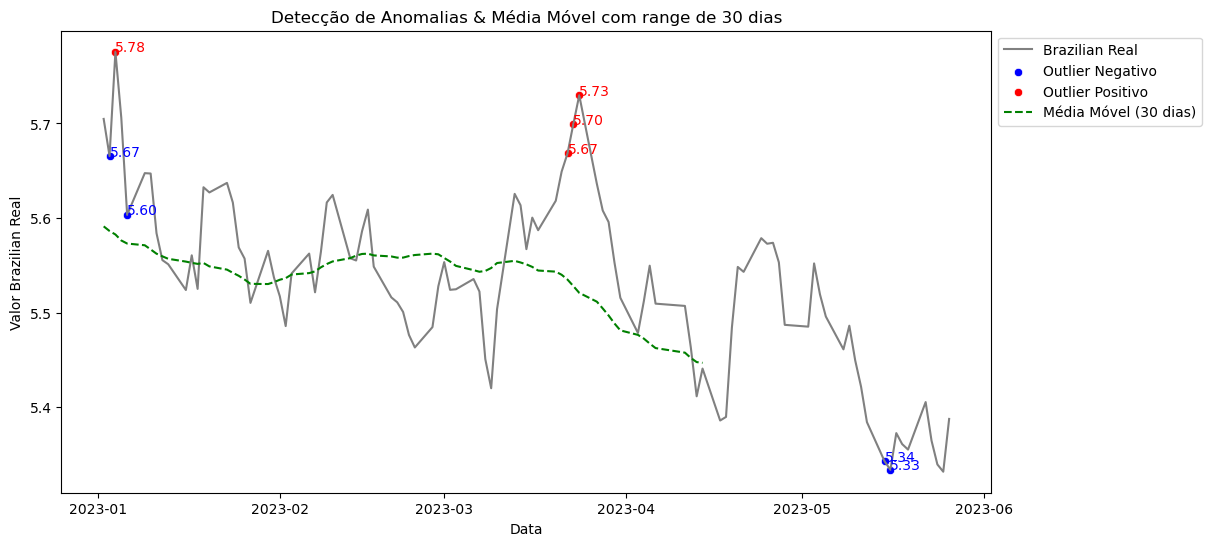

In [30]:
_graph_anomaly_seaborn(
    base = df_2023,
    country_currency = 'Brazilian real',
    rolling_window = 30
)

#### 3.3.3.2 Dólar Americano (USD) x Euro (£)

In [14]:
# Últimos 5 dias da base
_calc_anomaly_(
    base = df_2023,
    country_currency = 'US dollar',
    rolling_window = 30
)[:5]

,date,US dollar,Q1,Q2,Q3,IQR,lower_bound,upper_bound,outlier_neg,outlier_pos,is_outlier
0,2023-05-26,1.0751,1.073650,1.08755,1.09605,0.022400,1.040050,1.107250,False,False,False
1,2023-05-25,1.0735,1.073200,1.08755,1.09605,0.022850,1.038925,1.107475,False,False,False
2,2023-05-24,1.0785,1.071425,1.08755,1.09605,0.024625,1.034488,1.108362,False,False,False
3,2023-05-23,1.0779,1.070050,1.08755,1.09605,0.026000,1.031050,1.109050,False,False,False
4,2023-05-22,1.0822,1.067925,1.08755,1.09605,0.028125,1.025737,1.110113,False,False,False


In [15]:
# Plot do histórico com a identificação das anomalias móveis (30 dias)
_graph_anomaly_plotly(
    base = df_2023,
    country_currency = 'US dollar',
    rolling_window = 30
)

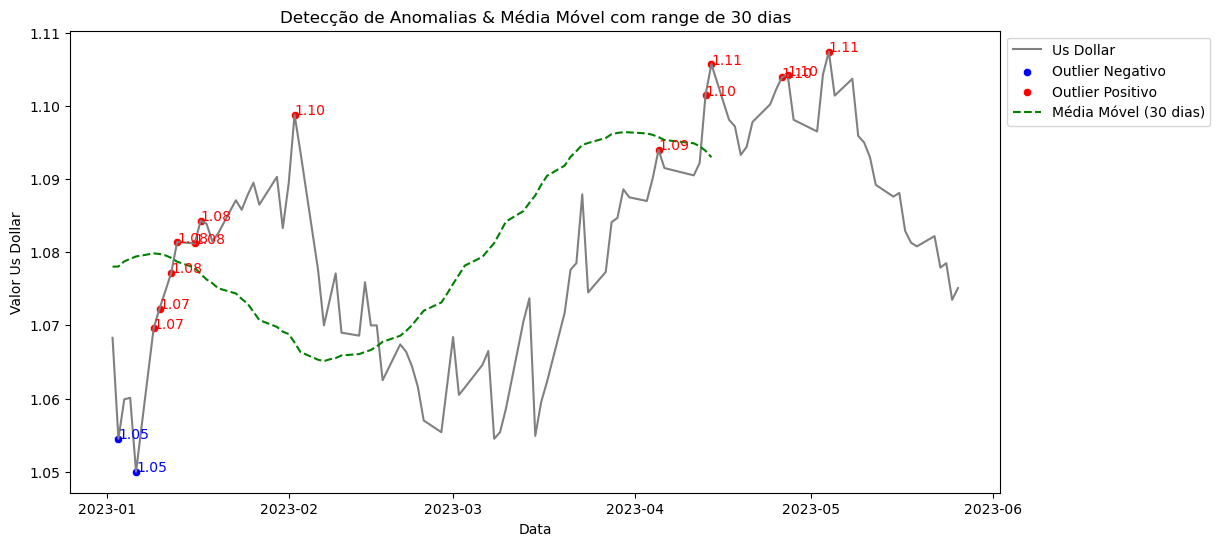

In [16]:
_graph_anomaly_seaborn(
    base = df_2023,
    country_currency = 'US dollar',
    rolling_window = 30
)